# Apresentação

Neste capítulo, iniciaremos o estudo de **_Artificial Neural Network_ (ANN)** no contexto **Visão Computacional**. Compreenderemos a necessidade de uma rede única que realize tanto a extração de características quanto a classificação de uma só vez (_single shot_), antes de aprendermos sobre a arquitetura e os vários componentes de uma **rede neural artificial**. Em seguida, vamos ver como conectar as diversas camadas de uma rede antes de implementar a **propagação direta (_feedforward_**) para calcular o valor da **perda (_loss_)** correspondente aos pesos atuais da rede.

Posteriormente, implementaremos o **retropropagação (_backpropagation_)** para entender como otimizar os pesos **(_weights_)** visando minimizar o valor da perda e aprenderemos como a **taxa de aprendizado (_learning rate_)** desempenha um papel fundamental na obtenção dos pesos ideais. Além disso, implementaremos todos os componentes de uma rede — **_feedfoward_**, **funções de ativação (_activation function_)**, **funções de perda (_loss function_)**, a **regra da cadeia** e o **gradiente descendente** para atualizar os pesos — do zero em **NumPy**, para que tivéssemos uma base sólida para construir nos próximos capítulos.

# Documento de Apoio:
Para esse capitulo, além do material do livro, eu usei alguns outros materiais de apoio para complementar o conteúdo do livro.

- [Github oficial do Livro](https://github.com/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/tree/main/Chapter01)
- [Documentação NumPy](https://numpy.org/devdocs/user/index.html#user)


- [Álgebra Linear com Aplicações - 10.ed. Howard Anton](https://www.amazon.com.br/%C3%81lgebra-Linear-Aplica%C3%A7%C3%B5es-Howard-Anton/dp/8540701693)
- [Guidorizzi Vol. 2](https://www.amazon.com.br/Curso-C%C3%A1lculo-Hamilton-Luiz-Guidorizzi/dp/852161280X)
- [S. Haykin 3º Edt](https://dai.fmph.uniba.sk/courses/NN/haykin.neural-networks.3ed.2009.pdf)



In [7]:
import sys
from pathlib import Path

# Encontra o diretório raiz do projeto (onde está a pasta 'utils')
notebook_dir = Path.cwd()
root_dir = notebook_dir.parent.parent  # Sobe dois níveis

# Adiciona ao sys.path
if str(root_dir) not in sys.path:
    sys.path.insert(0, str(root_dir))

# Importando função para plotar imagens
from utils.utilities import get_image

In [19]:
# Dependências
import numpy as np
from random import randint as rand

# Artificial Neural Network (ANN)

Aqui o livro começa a formular a construção das **Rede Neurais**, os blocos que a compõe, as diferenças entre desse tipo de modelo, dos modelos de **_Machine Learning_** e a construção computacional desse modelo.

## ANNs vs ML Tradicional  

A **Rede Neural Artificial (ANNs)** é uma família de modelos baseada em multicamadas que faz parte do campo de **_Deep Learning_**. A sua principal diferença de modelos de **_Machine Learning_ tradicional**, que é o motivo dessas multicamadas, é que o modelo de **Rede Neural** faz **_Feature Selection_**, ou seja, o próprio modelo se encarrega de escolher as features que são importante. Enquanto, no **_Machine Learning_ tradicional**, isso é feito de forma manual.

    Óbvio que, na prática, a gente consegue automatizar esse processo feature selection também. Mas o importante de entender é que essa etapa de feature selection não faz parte da arquitetura do modelos probabilisticos usados em Machine Learning.

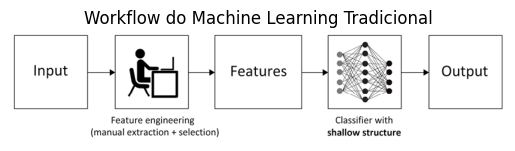

In [12]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781803231334/files/Images/B18457_01_02.png",
    title="Workflow do Machine Learning Tradicional"
)

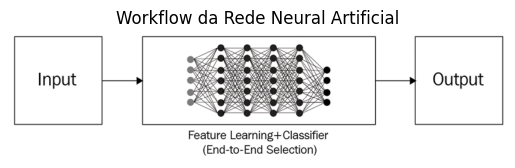

In [11]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781803231334/files/Images/B18457_01_05.png",
    title="Workflow da Rede Neural Artificial"
)

## Os blocos fundamentas de uma ANN

Uma **Rede Neural** é um conjunto de tensores (_weights_) e operações matemáticas, que tem como objetivo reconstruir a função que relaciona os dados de _input_ e _output_ por meio de uma combinção de operações **lineares** e **não-lineares**. 

A disposição das operações que conecta essas entradas às saídas é chamada de **arquitetura** da rede neural – que podemos personalizar com base na tarefa que estamos tentando resolver. Porém, a sua estrutura respeita sempre a seguinte organização.


* **Camadas de entrada:** Essas camadas recebem as variáveis independentes como entrada.

* **Camadas ocultas (intermediárias):** Essas camadas conectam as camadas de entrada e saída enquanto realizam transformações sobre os dados de entrada. Além disso, as camadas ocultas (_hidden layers_) contêm nós (unidades/círculos no diagrama a seguir) para modificar seus valores de entrada em valores de dimensão superior ou baixa. A funcionalidade para alcançar uma representação mais complexa é alcançada usando várias **funções de ativação (_Activation Function_)** que modificam os valores dos nós das camadas intermediárias.

* **Camada de saída:** Isso gera os valores que as variáveis de entrada devem obter ao serem passadas pela rede.


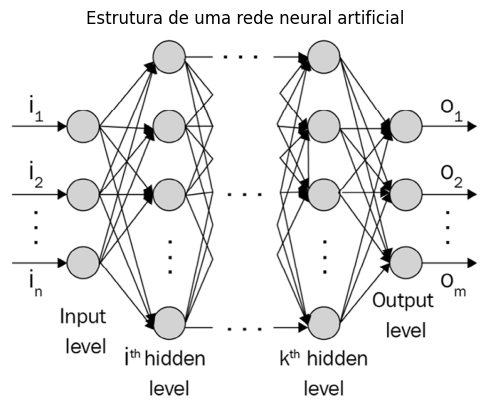

In [10]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781803231334/files/Images/B18457_01_06.png",
    title="Estrutura de uma rede neural artificial"
)

O número de **nós** (círculos no diagrama anterior) na **camada de saída** depende da tarefa em curso e se estamos tentando prever uma **variável contínua (Regressão)** ou uma **variável categórica (Classificação)**. Se a saída for uma variável contínua, a saída possui um nó. Se a saída for categórica com m classes possíveis, haverá $m$ nós na camada de saída.

    O livro só comenta a quantidade de nós na última camada. Até onde eu sei, não exite teoria que defina a quantidade de nós necessárias para uma boa predição no contexto das camadas ocultas... Nem na quantidade de nós, nem da quantidade de layers.

    Um outro ponto importante que o livro não defini bem. Formalmente, "nós" são unidades de perceptrons (Perceptron de Rosenblatt). O livro irá se aprofundar na matemática desses "nós".

Vamos dar um zoom em um dos nós/neurônios e ver o que está acontecendo. Um neurônio transforma suas entradas da seguinte forma:

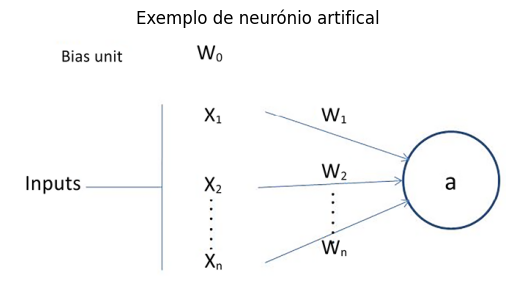

In [13]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781803231334/files/Images/B18457_01_07.png",
    title="Exemplo de neurónio artifical"
)

No diagrama, $x_1, x_2, \dots, x_n$ são as variáveis de entrada, e $w_0$ é o termo de víes. (É a mesma estrutura de uma regressão linear/logística). Matemáticamente, temos,

$$a=f(w_0 + \sum_{i=1}^n w_ix_i)$$

onde $f$ é a _activation function_, ou **função deslinearizadora**, que é responsável por aplicar a não linearidade sobre a **projeção linear**. A idea de inserir camadas ocultas, vem da ideia de alcançar aumentar o nível de não linearidade na modelagem. Um dos grandes diferenciais da **Rede Neural** é justamente o empilhamento dessas camadas ocultas.

    Diga-se de passagem, uma rede neural sem camadas ocultas arquiteturada para classificação nada mais é do que um modelo de regressão logística. A regressão logística é uma rede neural de classificação sem camadas ocultas.

    Um outro ponto MUITO importante que o livro não menciona é a importância da dimensão matricial desses neurônios. Na pratica realizando operações entre vetores. Multiplicação de matriz depende que elas tenham dimensões adequadas. A dimensão dos neurônios precisa estar apropriada para a realização da multiplicação de matrizes, porque se não o código quebra.

Essa é a arquitetura de **redes neurais**, é um modelo multicamadas (_mult layers_) que **combina transformações lineares** e **não-lineares**.

In [20]:
def vector_generator(size):
    return np.array([rand(-10, 10)/rand(1, 10) for _ in range(size)])

In [35]:
# Dados artificias
x = vector_generator(50)
y = vector_generator(50)

# Parametros do modelo
W = np.random.randn(50, 50)     # 50 neurônios
b = np.random.randn(50)         # 50 biases

In [39]:
# Projeção linear y = x.T*W + b
logits = x.T @ W + b;logits

array([-39.9514253 , -14.27151847, -12.56880643,  28.84008548,
        -3.12336422,  -2.72350148, -20.75635204,  -8.41135634,
        19.53000677,   4.9498897 ,   5.47322457, -20.12144994,
        -1.1908329 ,  49.69071394, -25.31714923,  -3.42149615,
       -19.2343515 ,  -6.75311994,  -3.56465982, -22.59561014,
         3.85675736,   7.28069484,  -8.91620007, -12.39757267,
       -18.19707935, -13.47846733,  30.3295891 , -35.78221881,
       -32.34736091,  -5.74427069,   6.47815347, -11.29947065,
       -19.44844383,  -3.92083151,  16.59988853,   5.93365513,
       -15.25255318,  28.50606493,  19.71352388,  51.82666527,
       -36.89269787, -29.85210313,  14.78163872,  33.09195325,
       -24.18661333,   4.6689944 , -23.14025293, -14.70934297,
        16.76822558, -10.47630098])

## Implementação da propagação feedfoward

A propagação feedfoward nada mais é do que o processo de geração de _outputs_, é entrar com os dados de _input_ na rede e deixar o processo acontecer até sair os _outputs_.

    O livro explica que por simplificação ele não introduzirá os viéses no exemplo teorico que ele mostra. O que eu acho um erro muito grande, dado que ele é parte fundamental do processo, mas considere que na prática, além da soma dos produtos, ainda há a soma dos viéses.

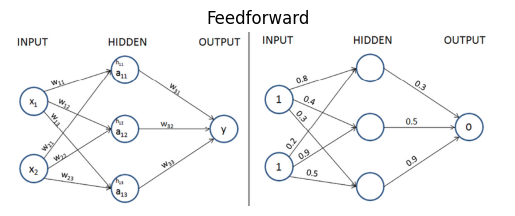

In [14]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781803231334/files/Images/B18457_01_09.png",
    title="Feedforward"
)

### Aplicação da função de ativação

As **funções de ativação** ajudam a modelar a relações complexas entre a entrada e a saída. Algumas das funções de ativação frequentemente usadas são calculadas da seguinte forma:

$$\text{Sigmoid activation}(x) = \frac{1}{1+e^{-x}}$$

$$
\mathrm{ReLU}(x) =
\begin{cases}
x, & \text{se } x > 0 \\
0, & \text{se } x \le 0
\end{cases}
$$

$$\text{Tanh activation}(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$
$$\text{Linear activation}(x) = x$$

    Eu particularmente sempre gosto de frizar que essas funções de ativação não caem do céu. A Sigmoid por exemplo é a inversão do logit, lá dos regressão logistica. Aqui eu não vou entrar em Modelos Lineares Generalizados, que é de onde vem a regressão logistica, ou em funções de ligação (link function), ma basta dizer essas funções de ativação tem bases matemáticas bem sólidas e muitas vezes elas veêm de outros contextos e são usadas aqui também.

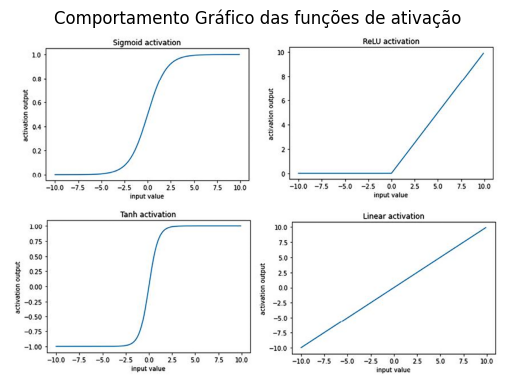

In [15]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781803231334/files/Images/B18457_01_11.png",
    title="Comportamento Gráfico das funções de ativação"
)

In [18]:
# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
# Função de ativação ReLU
def book_relu(x):
    return np.where(x > 0, x, 0) # Jeito apresentado no livro

def relu(x):
    return np.maximum(0, x) # Jeito mais simples de se implementar

In [31]:
# Função de ativação Tanh
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [45]:
# Teste da função de ativação:
hat_y_relu = relu(logits)
hat_y_sigmoid = sigmoid(logits)
hat_y_tanh = tanh(logits)

print("ReLU: ", hat_y_relu, hat_y_relu.shape, end="\n\n")
print("Sigmoid: ", hat_y_sigmoid, hat_y_sigmoid.shape, end="\n\n")
print("Tanh: ", hat_y_tanh, hat_y_tanh.shape, end="\n\n")

ReLU:  [ 0.          0.          0.         28.84008548  0.          0.
  0.          0.         19.53000677  4.9498897   5.47322457  0.
  0.         49.69071394  0.          0.          0.          0.
  0.          0.          3.85675736  7.28069484  0.          0.
  0.          0.         30.3295891   0.          0.          0.
  6.47815347  0.          0.          0.         16.59988853  5.93365513
  0.         28.50606493 19.71352388 51.82666527  0.          0.
 14.78163872 33.09195325  0.          4.6689944   0.          0.
 16.76822558  0.        ] (50,)

Sigmoid:  [4.45981095e-18 6.33808422e-07 3.47884607e-06 1.00000000e+00
 4.21537258e-02 6.16007483e-02 9.67455153e-10 2.22278681e-04
 9.99999997e-01 9.92965642e-01 9.95819872e-01 1.82543059e-09
 2.33110006e-01 1.00000000e+00 1.01135073e-11 3.16303694e-02
 4.43228093e-09 1.16587140e-03 2.75274056e-02 1.53762773e-10
 9.79301075e-01 9.99311767e-01 1.34179210e-04 4.12858100e-06
 1.25057242e-08 1.40079765e-06 1.00000000e+00 2.88389751

### Calculo da perda

Dado que já sabemos como o _feedfoward_ funciona, precisamos então avaliar o resultado das saídas. **Redes Neurais** são modelos do ramo de **aprendizado supervisionado**, ou seja, sabemos que o processo de treinamento passa por comparar a saída do modelo com a entrada. Aqui, vamos avaliar a função de perde para os dois contextos, predição no **contínuo e no discreto**, ou para as tarefas de **regressão e classificação**.